<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/slave/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
train_path="/content/train.csv"
test_path="/content/test.csv"
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)
y=train['Loan_Status']

In [98]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [133]:
train[train['Credit_History']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [0]:
X_gender_train=pd.get_dummies(train['Gender'])
X_married_train=pd.get_dummies(train['Married'])
X_Self_Employed_train=pd.get_dummies(train['Self_Employed'])
X_Property_Area_train=pd.get_dummies(train['Property_Area'])

In [0]:
X_gender_test=pd.get_dummies(test['Gender'])
X_married_test=pd.get_dummies(test['Married'])
X_Self_Employed_test=pd.get_dummies(test['Self_Employed'])
X_Property_Area_test=pd.get_dummies(test['Property_Area'])

In [0]:
X_Self_Employed_train.rename(columns = {'No':'Self_Employed_No','Yes':'Self_Employed_yes'},inplace = True) 
X_married_train.rename(columns = {'No':'Married_No','Yes':'Married_yes'},inplace = True)

In [0]:
X_Self_Employed_test.rename(columns = {'No':'Self_Employed_No','Yes':'Self_Employed_yes'},inplace = True) 
X_married_test.rename(columns = {'No':'Married_No','Yes':'Married_yes'},inplace = True)

In [0]:
X_Self_Employed_test.rename(columns = {'No':'Self_Employed_No','Yes':'Self_Employed_yes'},inplace = True) 
X_married_test.rename(columns = {'No':'Married_No','Yes':'Married_yes'},inplace = True)

In [0]:
frames=[X_train,X_gender_train,X_married_train,X_Self_Employed_train,X_Property_Area_train]
X_new_train=pd.concat(frames,axis='columns')

In [0]:
frames=[X_test,X_gender_test,X_married_test,X_Self_Employed_test,X_Property_Area_test]
X_new_test=pd.concat(frames,axis='columns')

In [0]:
X_new_train['Dependents']=X_new_train['Dependents'].replace('3+','3')
X_new_test['Dependents']=X_new_test['Dependents'].replace('3+','3')

In [0]:
X_new_train.drop(['Loan_ID','Gender','Married','Self_Employed','Property_Area','Married_No','Self_Employed_No','Female','Urban'],axis=1,inplace=True)
X_new_test.drop(['Loan_ID','Gender','Married','Self_Employed','Property_Area','Married_No','Self_Employed_No','Female','Urban'],axis=1,inplace=True)

In [0]:
le=LabelEncoder()
X_new_train['Education']=le.fit_transform(X_new_train.Education)
X_new_train['Dependents']=X_new_train['Dependents'].apply(pd.to_numeric) 

X_new_test['Education']=le.fit_transform(X_new_test.Education)
X_new_test['Dependents']=X_new_test['Dependents'].apply(pd.to_numeric) 

X_new_train['Loan_Status']=le.fit_transform(X_new_train['Loan_Status'])

In [109]:
X_new_train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married_yes,Self_Employed_yes,Rural,Semiurban
0,0.0,0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0
1,1.0,0,4583,1508.0,128.0,360.0,1.0,0,1,1,0,1,0
2,0.0,0,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,0
3,0.0,1,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0
4,0.0,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0


In [110]:
X_new_train.dtypes

Dependents           float64
Education              int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int64
Male                   uint8
Married_yes            uint8
Self_Employed_yes      uint8
Rural                  uint8
Semiurban              uint8
dtype: object

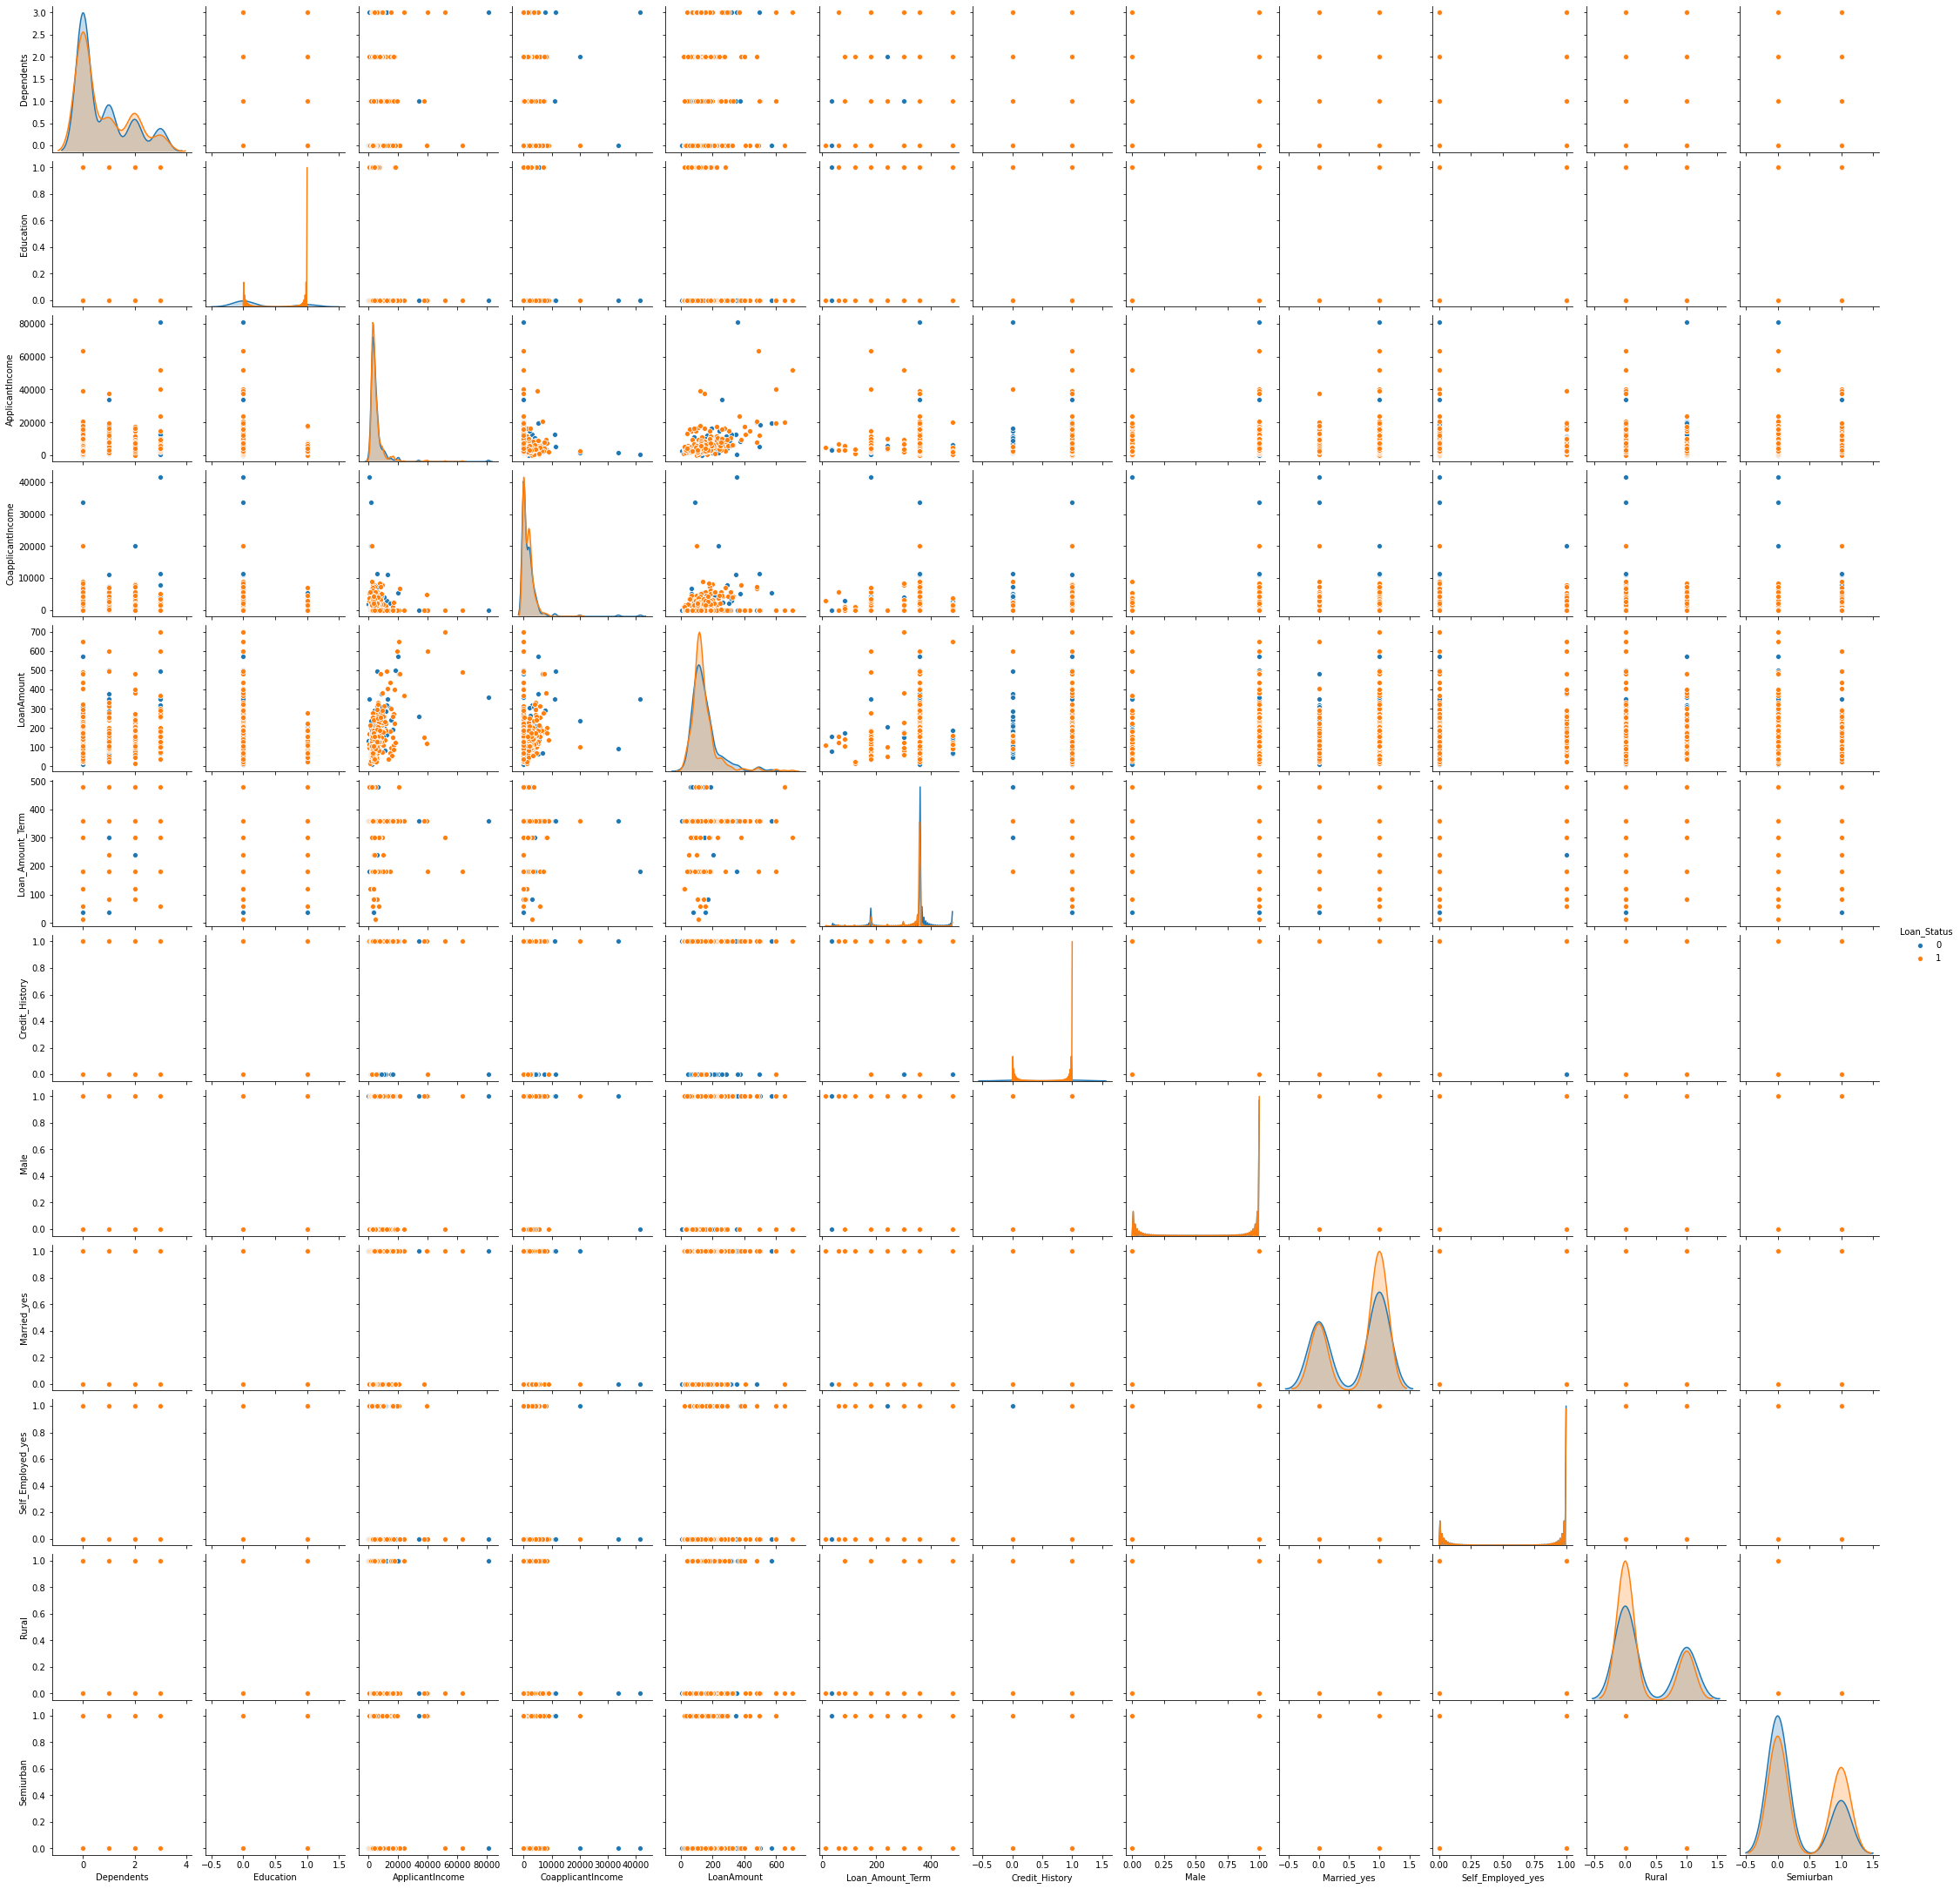

In [111]:
#sns.pairplot(X_new_train,hue='Loan_Status')

In [112]:
X_new_train.isnull().sum()

Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
Male                  0
Married_yes           0
Self_Employed_yes     0
Rural                 0
Semiurban             0
dtype: int64

In [0]:
X_new_train=X_new_train.drop(columns='Loan_Status',axis=1)

In [0]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_new_train)
X_train_imputed=imputer.transform(X_new_train.values)

In [0]:
imputer.fit(X_new_test)
X_test_imputed=imputer.transform(X_new_test.values)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
scaler_test = StandardScaler()
scaler_train.fit(X_train_imputed)
X_train_imputed = scaler_train.transform(X_train_imputed)
scaler_test.fit(X_test_imputed)
X_test_imputed = scaler_test.transform(X_test_imputed)

# Bagging
use normal data with standard scaler


In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1,oob_score=True)
bag_clf.fit(X_train_imputed, y)
y_pred = bag_clf.predict(X_test_imputed)

In [118]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [119]:
for i in range(367):
  print(y_pred[i])

Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
N
Y
Y
Y
Y
N
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,bootstrap=True,oob_score=True)
rnd_clf.fit(X_train_imputed, y)
y_pred_rf = rnd_clf.predict(X_test_imputed)

In [121]:
y_pred_rf is y_pred

False

In [122]:
for i in range(367):
  print(y_pred_rf[i])

Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
N
Y
Y
Y
Y
N
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
N
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


# ExtraTreesClassifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,bootstrap=True,oob_score=True)
ext_clf.fit(X_train_imputed, y)
y_pred_ef = ext_clf.predict(X_test_imputed)

In [124]:
for i in range(367):
  print(y_pred_ef[i])

Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
N
Y
Y
Y
Y
N
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
N
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


# KNN algo

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train_imputed, y)
y_pred_knn=classifier.predict(X_test_imputed)

In [145]:
for i in range(367):
  print(y_pred_knn[i])

Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
N
Y
Y
Y
Y
N
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
N
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
N
N
Y
N
N
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


In [135]:
math.sqrt(len(X_test_imputed))

19.157244060668017